In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score
from matplotlib import pyplot as plt
from nn.nn import NeuralNetwork

In [2]:
# Load digits dataset
mnist = datasets.load_digits()
# Split data into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Normalize image data so that values are of range [0, 1]
mnist_max = mnist.data.max()
X_train, X_val, y_train, y_val = X_train/mnist_max, X_val/mnist_max, y_train, y_val

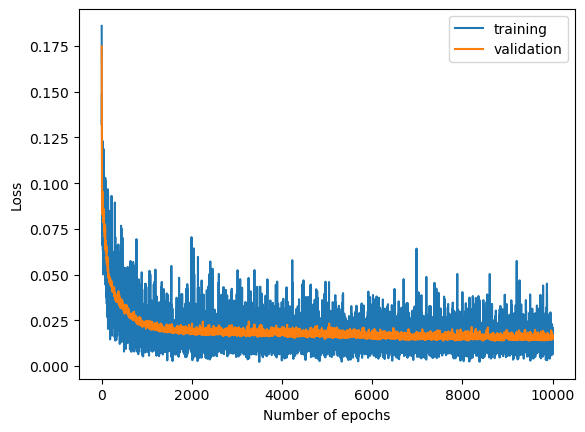

In [3]:
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]
lr = 1e-01
seed = 42
batch_size = 1
epochs = 10000
loss_function = 'mse'

# Generate 64x16x64 autoencoder. 
model = NeuralNetwork(nn_arch, lr, seed, batch_size, epochs, loss_function)
# Train on digits dataset, and quantify the reconstruction error.
# For reconstruction, the "truth values" are the input 
loss_train, loss_val = model.fit(X_train, X_train, X_val, X_val)

plt.plot(np.arange(epochs)+1, loss_train, label='training')
plt.plot(np.arange(epochs)+1, loss_val, label='validation')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()

In [4]:
# Quantify average reconstruction error
X_hat = model.predict(X_val)
print('Reconstruction MSE (mean squared error):', model._mean_squared_error(X_val, X_hat))

Reconstruction MSE (mean squared error): 0.014725607994089524


True image:


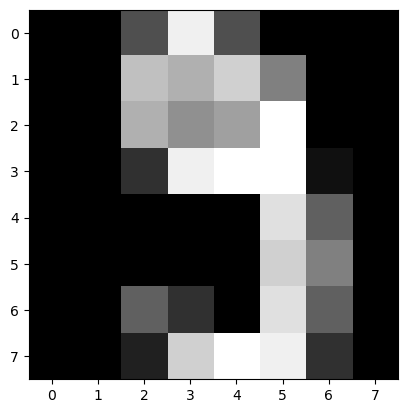

Reconstructed image:


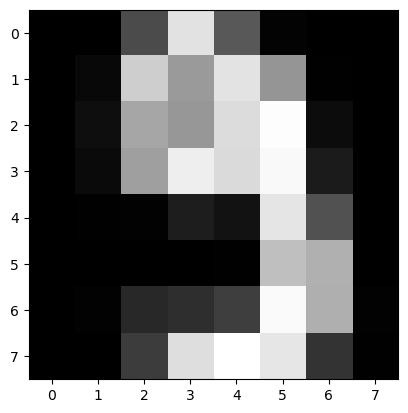

In [5]:
# Visual demonstration of reconstruction
print('True image:')
plt.imshow(X_val[10].reshape(8,8), cmap='gray')
plt.show()
print('Reconstructed image:')
plt.imshow(X_hat[10].reshape(8,8), cmap='gray')

### Hyperparameter testing

pixel value, counts:
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.] 
 [56272  4095  3296  2944  3261  2803  2559  2627  3464  2585  2711  2845
  3668  3509  3609  4304 10456]


Text(0, 0.5, 'counts')

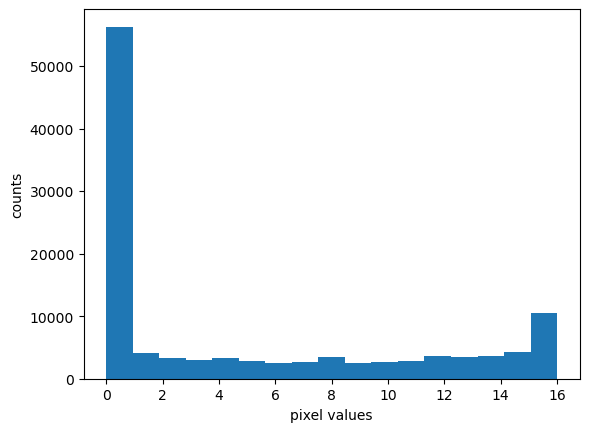

In [6]:
a,b = np.unique(mnist.data.flatten(), return_counts=True)
print("pixel value, counts:\n", a, '\n', b)
plt.hist(mnist.data.flatten(), bins=17)
plt.xlabel('pixel values')
plt.ylabel('counts')

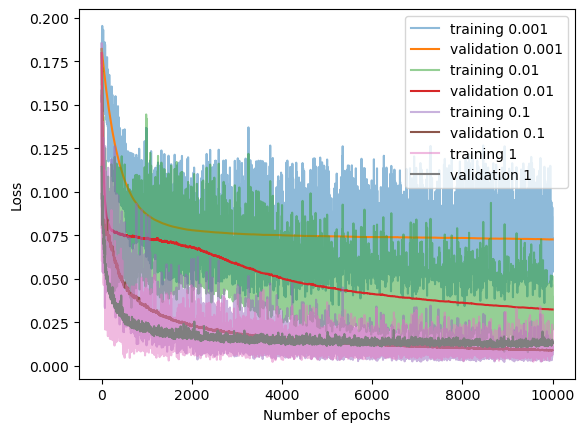

In [7]:
nn_arch = [{'input_dim': 64, 'output_dim': 32, 'activation': 'sigmoid'}, {'input_dim': 32, 'output_dim': 64, 'activation': 'sigmoid'}]
lrs = [1e-03, 1e-02, 1e-01, 1]
seed = 42
batch_size = 1
epochs = 10000
loss_function = 'mse'

# Generate 64x16x64 autoencoder. 
for lr in lrs:
    model = NeuralNetwork(nn_arch, lr, seed, batch_size, epochs, loss_function)
    # Train on digits dataset, and quantify the reconstruction error.
    # For reconstruction, the "truth values" are the input 
    loss_train, loss_val = model.fit(X_train, X_train, X_val, X_val)
    plt.plot(np.arange(epochs)+1, loss_train, label='training ' + str(lr), alpha=0.5)
    plt.plot(np.arange(epochs)+1, loss_val, label='validation ' + str(lr))
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()


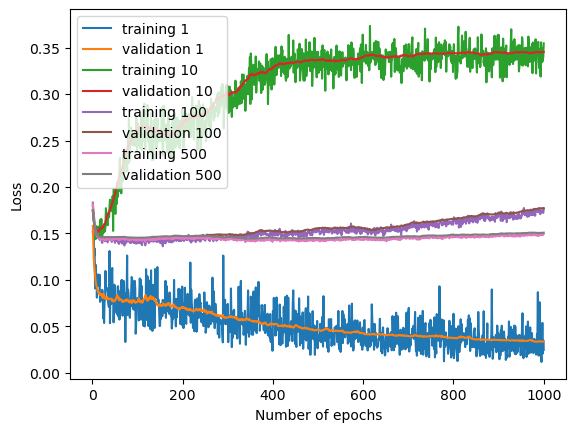

In [8]:
nn_arch = [{'input_dim': 64, 'output_dim': 32, 'activation': 'sigmoid'}, {'input_dim': 32, 'output_dim': 64, 'activation': 'sigmoid'}]
lr = 1e-01
seed = 42
batch_sizes = [1, 10, 100, 500]
epochs = 1000
loss_function = 'mse'

# Generate 64x16x64 autoencoder. 
for batch_size in batch_sizes:
    model = NeuralNetwork(nn_arch, lr, seed, batch_size, epochs, loss_function)
    # Train on digits dataset, and quantify the reconstruction error.
    # For reconstruction, the "truth values" are the input 
    loss_train, loss_val = model.fit(X_train, X_train, X_val, X_val)
    plt.plot(np.arange(epochs)+1, loss_train, label='training ' + str(batch_size))
    plt.plot(np.arange(epochs)+1, loss_val, label='validation ' + str(batch_size))
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()


For a 64x16x64 autoencoder, one 16-dimensional ReLU-activation hidden layer is used, followed by a sigmoid-activation output layer to reconstruct the 64-dimensional image vector. A histogram of MNIST pixel values shows a bimodal distribution with modes 0 and 16, suggesting that a sigmoid-activation output layer is ideal for reconstruction after normalizing pixel values to range [0, 1].

A learning rate of 0.1 provides the minimum achievable validation loss in 10000 epochs. Varying batch size demonstrates that stochastic gradient descent (batch_size = 1) outperforms mini-batch gradient descent.